## Repaso de Machine Learning y Ejemplo de Gradient Descent

En este notebook, resolveremos un problema simple de regresión por medio de gradient descent.
Mostraremos cómo Stochastic Gradient Descent (SGD) difiere de la versión estándar y el efecto de "revolver" los datos durante SGD.


In [2]:
import sys
sys.version

'3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]'

In [3]:
# Preliminaries - packages to load

from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Generar datos de una distribución conocida
Generaremos datos de una distribución conocida.
El modelo verdadero es:

$Y = b + \theta_1 X_1 + \theta_2 X_2 + \epsilon$

$X_1$ y $X_2$ tienen una distribución uniforme en el intervalo $[0,10]$, mientras `const` es un vector de unos (representa el término de intercepción).

Asignamos valores a $b$ ,$\theta_1$, y $\theta_2$

En este caso $b=1.5$, $\theta_1=2$, y $\theta_2=5$

Generamos un vector de $y$-values de acuerdo con el modelo y colocamos predictores juntos en un "feature matrix" `x_mat`

In [4]:
np.random.seed(1234)  ## This ensures we get the same data if all of the other parameters remain fixed

num_obs = 100
x1 = np.random.uniform(0,10,num_obs)
x2 = np.random.uniform(0,10,num_obs)
const = np.ones(num_obs)
eps = np.random.normal(0,.5,num_obs)

b = 1.5
theta_1 = 2
theta_2 = 5

y = b*const+ theta_1*x1 + theta_2*x2 + eps

x_mat = np.array([const,x1,x2]).T

## Obtener la respuesta "correcta" directamente
En las celdas de abajo resolvemos para el conjunto óptimo de coeficientes. El modelo verdadero está determinado por:

$b=1.5$, $\theta_1=2$, and $\theta_2=5$

El estimado de máxima probabilidad (least-squares) para un conjunto de datos finito puede ser ligeramente distinto.

## Ejercicio:
Resolver el problema con dos métodos: 
1. Empleando el modelo LinearRegression de scikit-learn
2. Empleando álgebra de matrices por medio de la fórmula $\theta = (X^T X)^{-1}X^Ty$

Note: scikit-learn podría generar un mensaje de advertencia que puede ser ignorado.

In [5]:
### Solve directly using sklearn
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression(fit_intercept=False)
lr_model.fit(x_mat, y)

lr_model.coef_

array([1.49004618, 1.99675416, 5.01156315])

In [6]:
## Solve by matrix calculation
np.linalg.inv(np.dot(x_mat.T,x_mat)).dot(x_mat.T).dot(y)

array([1.49004618, 1.99675416, 5.01156315])

## Resolver por medio de Gradient Descent
Otra forma de resolver este problema es por medio del método Gradient Descent. Exploraremos este método porque (como veremos) las redes neuronales se entrenan por medio de Gradient Descent. Observar cómo funciona Gradient Descent en un ejemplo simple ayudará a crear intuición y a comprender los detalles respecto a configuración del learning rate. También exploraremos Stochastic Gradient Descent y compararemos su desempeño con el enfoque estándar.

## Ejercicio

Las siguientes celda tienen código para realizar gradient descent (full-batch). Se han omitido algunos parámetros para ser completados por ti.

1. Selecciona un learning rate, número de iteraciones, ejecuta el código y grafica la trayectoria de gradient descent.
1. Busca ejemplos donde el learning rate sea muy elevado, muy bajo y "adecuado".
1. Visualiza las gráficas de la función de pérdida bajo estas condiciones.



In [7]:
## Parameters to play with 
learning_rate = .00001
num_iter = 1000
theta_initial = np.array([3,3,3])

In [8]:
## Initialization steps
theta = theta_initial
theta_path = np.zeros((num_iter+1,3))
theta_path[0,:]= theta_initial

loss_vec = np.zeros(num_iter)

## Main Gradient Descent loop (for a fixed number of iterations)
for i in range(num_iter):
    y_pred = np.dot(theta.T,x_mat.T)
    loss_vec[i] = np.sum((y-y_pred)**2)
    grad_vec = (y-y_pred).dot(x_mat)/num_obs  #sum up the gradients across all observations and divide by num_obs
    grad_vec = grad_vec
    theta = theta + learning_rate*grad_vec
    theta_path[i+1,:]=theta
    
    

(0, 500)

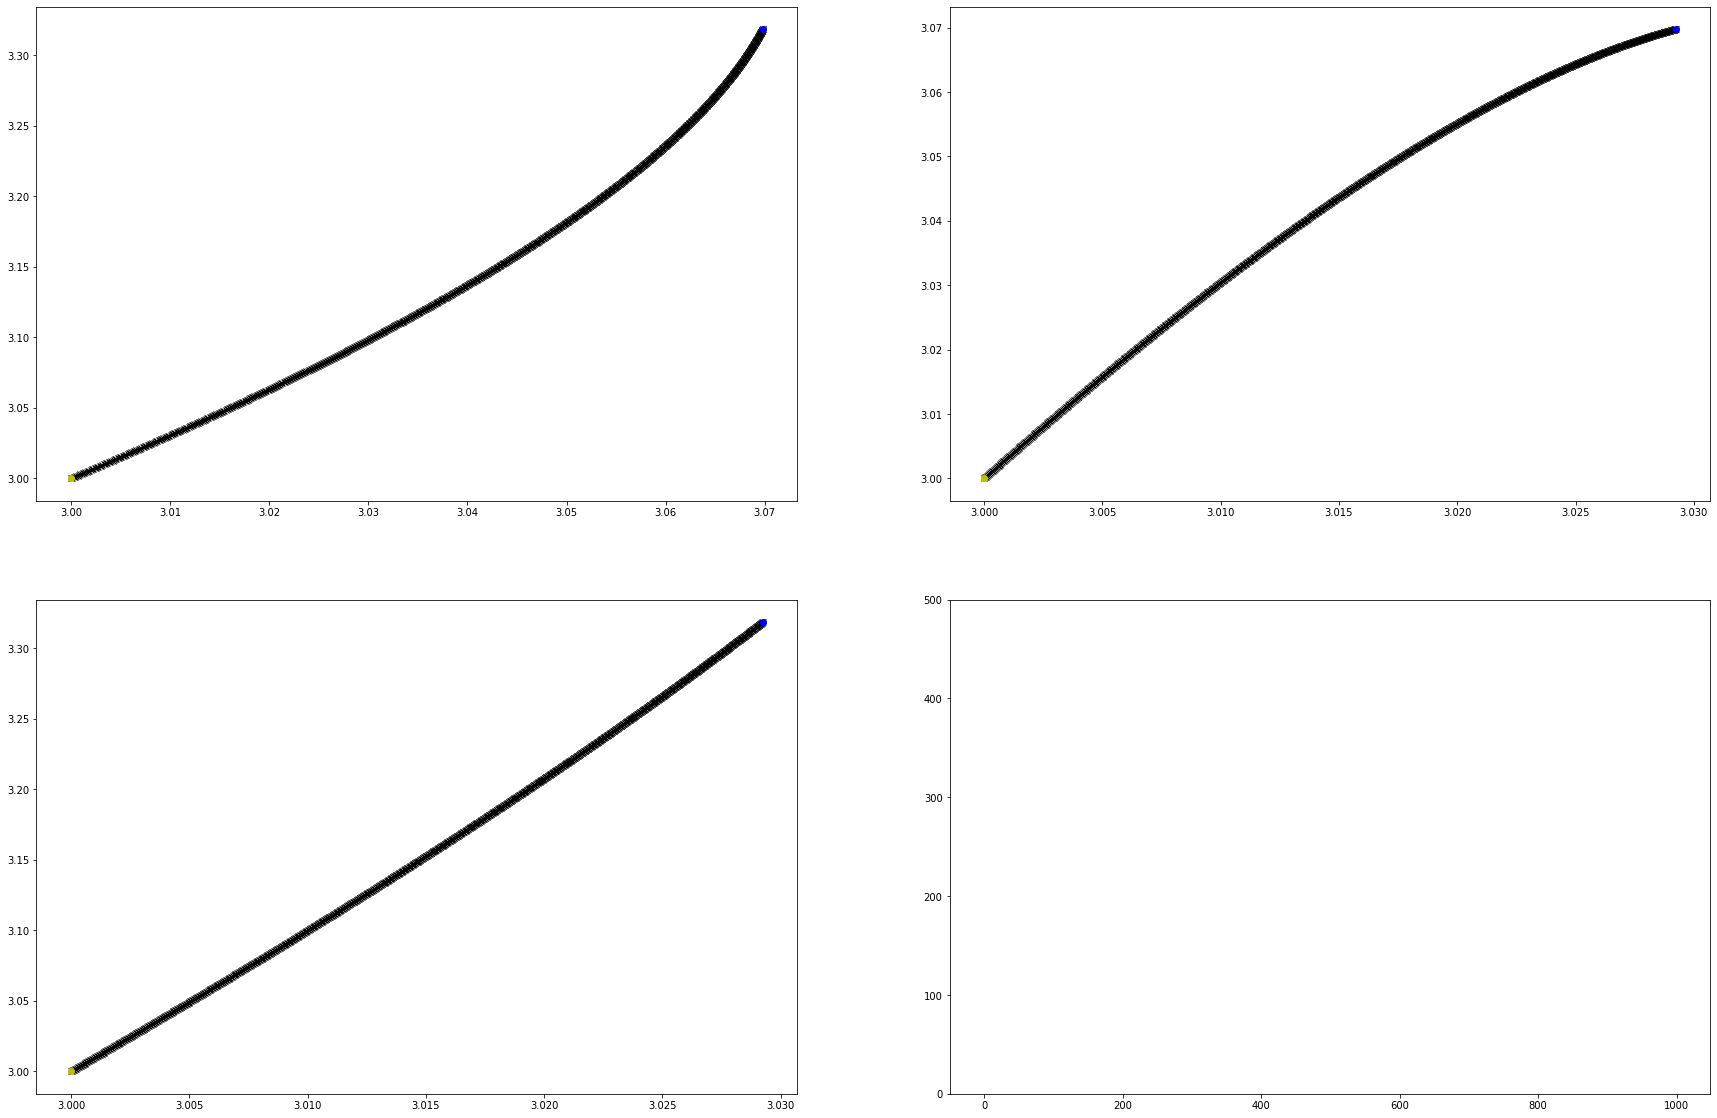

In [9]:
    
## Plot the results - it is a 3d parameter space - we plot 2d slices
## Green is starting point and blue is ending point
plt.figure(figsize = (30,20))
plt.subplot(2,2,1)
plt.plot(theta_path[:,1],theta_path[:,2],'k-x')
plt.plot(theta_path[0,1],theta_path[0,2],'yo')
plt.plot(theta_path[-1,1],theta_path[-1,2],'bo')
plt.subplot(2,2,2)
plt.plot(theta_path[:,0],theta_path[:,1],'k-x')
plt.plot(theta_path[0,0],theta_path[0,1],'yo')
plt.plot(theta_path[-1,0],theta_path[-1,1],'bo')

plt.subplot(2,2,3)
plt.plot(theta_path[:,0],theta_path[:,2],'k-x')
plt.plot(theta_path[0,0],theta_path[0,2],'yo')
plt.plot(theta_path[-1,0],theta_path[-1,2],'bo')

plt.subplot(2,2,4)
plt.plot(loss_vec)
plt.ylim([0,500])

## Plot the loss function

## Stochastic Gradient Descent
En vez de calcular un promedio de todo el dataset antes de avanzar un paso, ahora avanzaremos un paso por cada punto de datos. El efecto de cada paso será pronunciado, con el tiempo el resultado convergerá.

## Ejercicio
El código de abajo ejecuta Stochastic Gradient descent, pero corre con datos con el mismo orden cada vez.

1. Ejecuta el código y grafica. ¿Qué notas?
1. Modifica el código para que reordene los datos de forma aleatoria. ¿Cómo se comparan las trayectorias de ejemplo? [EJERCICIO OPCIONAL]

In [28]:
## Parameters to play with
learning_rate = 0.001 #0.002
num_iter = 100 #The number of "steps" will be num_iter * numobs #10
theta_initial = np.array([3,3,3])

In [30]:
## Initialization steps
theta = theta_initial
theta_path = np.zeros(((num_iter*num_obs)+1,3))
theta_path[0,:]= theta_initial
loss_vec = np.zeros(num_iter*num_obs)

In [31]:
## Main SGD loop
count = 0
for i in range(num_iter):
    for j in range(num_obs):
        count+=1
        y_pred = np.dot(theta.T,x_mat.T)
        loss_vec[count-1] = np.sum((y-y_pred)**2)
        grad_vec = (y[j]-y_pred[j])*(x_mat[j,:])
        theta = theta + learning_rate*grad_vec
        theta_path[count,:]=theta

(0, 500)

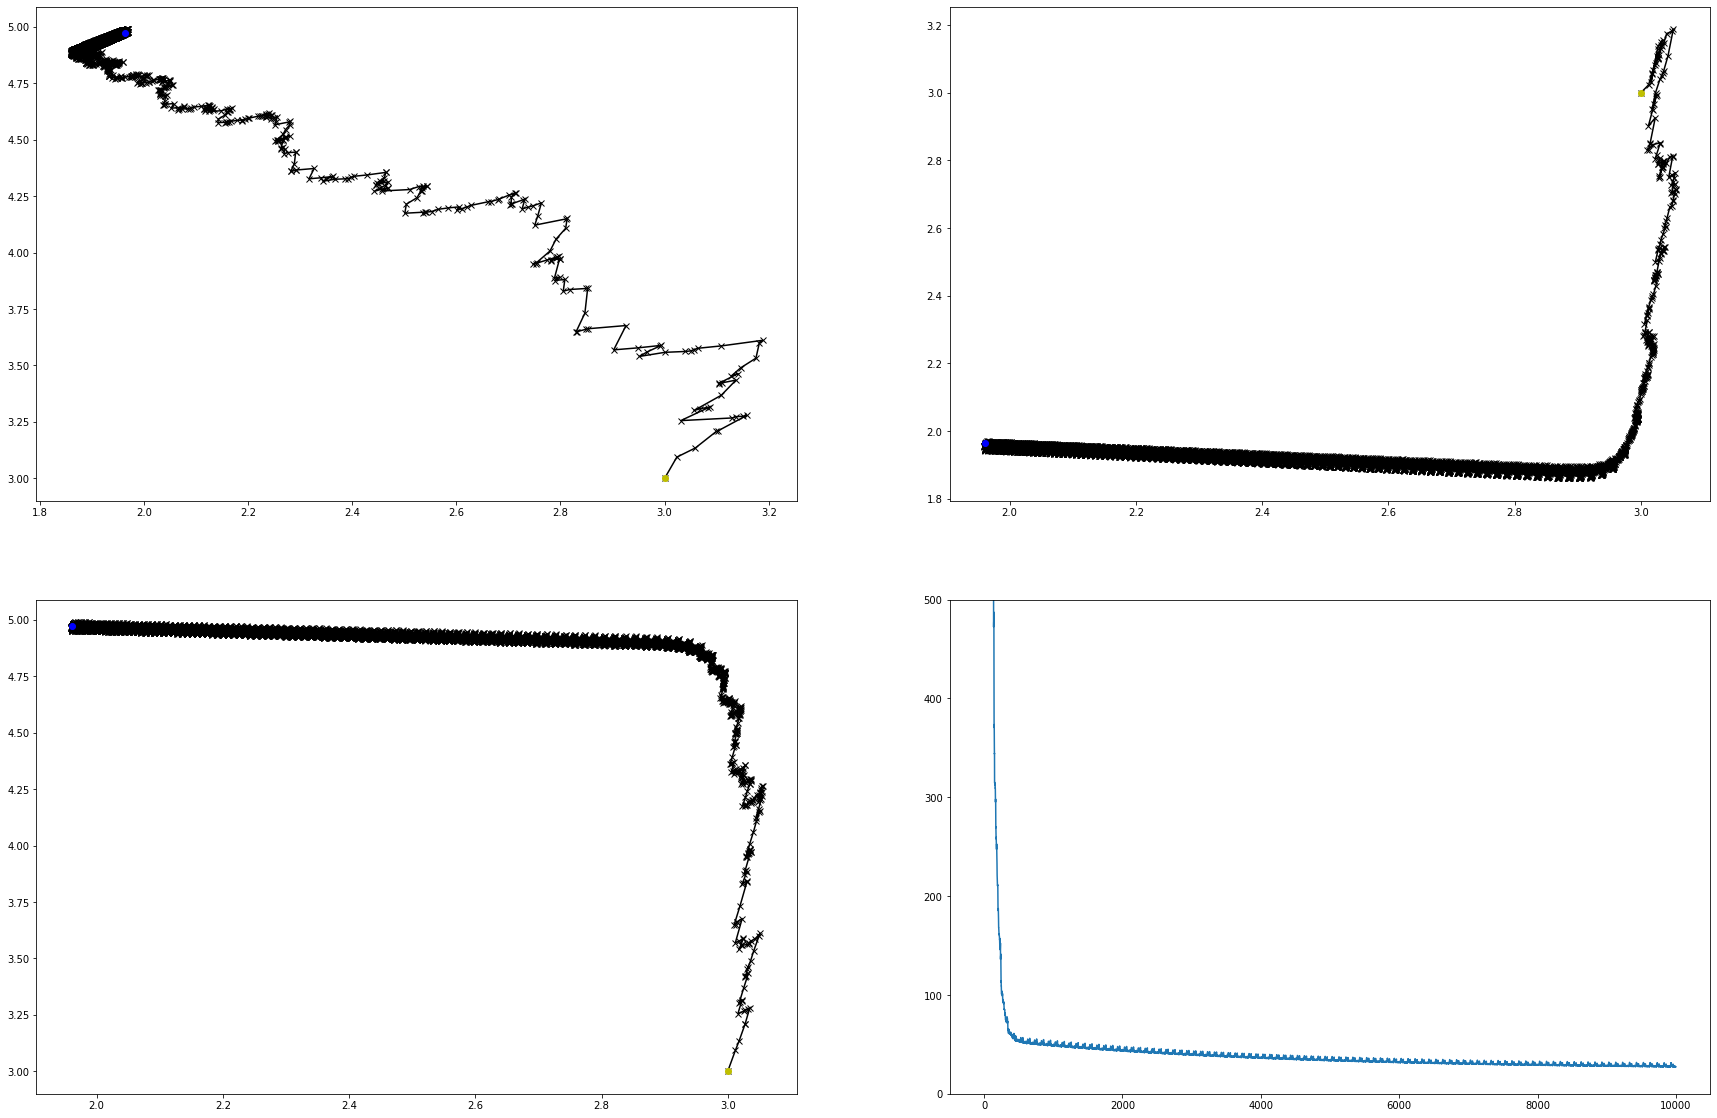

In [32]:
## Plot the results - it is a 3d parameter space - we plot 2d slices
## Green is starting point and blue is ending point
plt.figure(figsize = (30,20))
plt.subplot(2,2,1)
plt.plot(theta_path[:,1],theta_path[:,2],'k-x')
plt.plot(theta_path[0,1],theta_path[0,2],'yo')
plt.plot(theta_path[-1,1],theta_path[-1,2],'bo')
plt.subplot(2,2,2)
plt.plot(theta_path[:,0],theta_path[:,1],'k-x')
plt.plot(theta_path[0,0],theta_path[0,1],'yo')
plt.plot(theta_path[-1,0],theta_path[-1,1],'bo')

plt.subplot(2,2,3)
plt.plot(theta_path[:,0],theta_path[:,2],'k-x')
plt.plot(theta_path[0,0],theta_path[0,2],'yo')
plt.plot(theta_path[-1,0],theta_path[-1,2],'bo')

plt.subplot(2,2,4)
plt.plot(loss_vec)
plt.ylim([0,500])

In [ ]:
## Student to write code below.